In [190]:
import pandas as pd
import seaborn as sns

In [191]:
usa_births = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')
usa_births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15542,2008,10,NaN,M,183219
15543,2008,11,NaN,F,158939
15544,2008,11,NaN,M,165468
15545,2008,12,NaN,F,173215


In [192]:
usa_births.describe(include='all')

,year,month,day,gender,births
count,15547.000000,15547.000000,15067.000000,15547,15547.000000
unique,NaN,NaN,NaN,2,NaN
top,NaN,NaN,NaN,F,NaN
freq,NaN,NaN,NaN,7776,NaN
mean,1979.037435,6.515919,17.769894,NaN,9762.293561
std,6.728340,3.449632,15.284034,NaN,28552.465810
min,1969.000000,1.000000,1.000000,NaN,1.000000
25%,1974.000000,4.000000,8.000000,NaN,4358.000000
50%,1979.000000,7.000000,16.000000,NaN,4814.000000
75%,1984.000000,10.000000,24.000000,NaN,5289.500000


In [193]:
usa_births.dropna(inplace=True)
usa_births

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548
...,...,...,...,...,...
15062,1988,12,29.0,M,5944
15063,1988,12,30.0,F,5742
15064,1988,12,30.0,M,6095
15065,1988,12,31.0,F,4435


In [194]:
for field in ['day', 'month', 'year', 'births']:
    usa_births[field] = usa_births[field].astype(int)

usa_births

,year,month,day,gender,births
0,1969,1,1,F,4046
1,1969,1,1,M,4440
2,1969,1,2,F,4454
3,1969,1,2,M,4548
4,1969,1,3,F,4548
...,...,...,...,...,...
15062,1988,12,29,M,5944
15063,1988,12,30,F,5742
15064,1988,12,30,M,6095
15065,1988,12,31,F,4435


In [195]:
usa_births = usa_births[usa_births['day'] <= 31]

In [196]:
usa_births = usa_births.drop(usa_births[(usa_births['month'] == 4) | (usa_births['month'] == 6) | (usa_births['month'] == 9) | (usa_births['month'] == 11)].index)

In [197]:
usa_births = usa_births.drop(usa_births[(usa_births['month'] == 2) & (usa_births['day'] > 28)].index)

In [198]:
def is_leap_year(year):
    """Determine whether a year is a leap year."""
    return (year % 4 == 0) & ((year % 100 != 0) | (year % 400 == 0))
usa_births = usa_births.drop(usa_births[is_leap_year(usa_births['year']) & (usa_births['month'] == 2) & (usa_births['day'] > 28)].index)

In [199]:
pd.to_datetime(usa_births[['year','month','day']])
# pd.to_datetime((usa_births['day']).astype(str)+'-'+(usa_births['month']).astype(str)+'-'+(usa_births['year']).astype(str),infer_datetime_format=True)

0       1969-01-01
1       1969-01-01
2       1969-01-02
3       1969-01-02
4       1969-01-03
           ...    
15062   1988-12-29
15063   1988-12-30
15064   1988-12-30
15065   1988-12-31
15066   1988-12-31
Length: 9800, dtype: datetime64[ns]

In [200]:
# usa_births.loc[:,'year':'day']
usa_births['day_name'] = pd.to_datetime(usa_births[['year','month','day']]).dt.day_name()
usa_births

,year,month,day,gender,births,day_name
0,1969,1,1,F,4046,Wednesday
1,1969,1,1,M,4440,Wednesday
2,1969,1,2,F,4454,Thursday
3,1969,1,2,M,4548,Thursday
4,1969,1,3,F,4548,Friday
...,...,...,...,...,...,...
15062,1988,12,29,M,5944,Thursday
15063,1988,12,30,F,5742,Friday
15064,1988,12,30,M,6095,Friday
15065,1988,12,31,F,4435,Saturday


In [201]:
usa_births = usa_births.drop(['month', 'day'], axis='columns')
usa_births

,year,gender,births,day_name
0,1969,F,4046,Wednesday
1,1969,M,4440,Wednesday
2,1969,F,4454,Thursday
3,1969,M,4548,Thursday
4,1969,F,4548,Friday
...,...,...,...,...
15062,1988,M,5944,Thursday
15063,1988,F,5742,Friday
15064,1988,M,6095,Friday
15065,1988,F,4435,Saturday


In [202]:
usa_births.groupby(['year', 'day_name']).sum()

births
year day_name         
1969 Friday     366632
     Monday     345404
     Saturday   325230
     Sunday     295718
     Thursday   357772
...                ...
1988 Saturday   329925
     Sunday     314347
     Thursday   385623
     Tuesday    407234
     Wednesday  386401

[140 rows x 1 columns]

In [203]:
decade = pd.cut(usa_births.year, [1960, 1970 , 1980, 1990])
births_deacades_sum = usa_births.pivot_table('births',  decade, 'day_name',aggfunc='sum')
births_deacades_sum

day_name,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
year,,,,,,,
"(1960, 1970]",743560,703502,670216,610618,729616,734572,726316
"(1970, 1980]",3323088,3291463,2918434,2770382,3280576,3408720,3327328
"(1980, 1990]",3045741,2932604,2532121,2414572,3009688,3065689,2979877


<AxesSubplot:xlabel='year'>

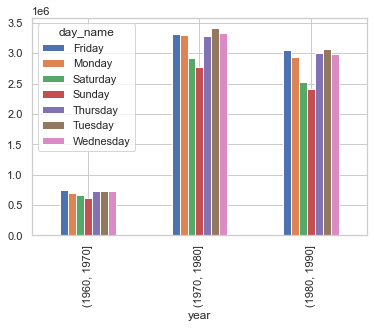

In [204]:
births_deacades_sum.plot(kind='bar')

<AxesSubplot:xlabel='day_name'>

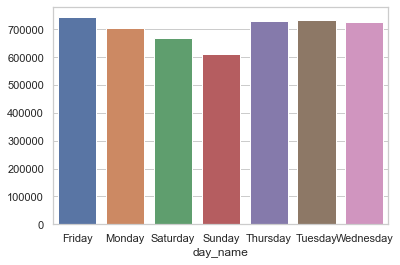

In [205]:
sns.set_theme(style="whitegrid")
sixties = pd.DataFrame(births_deacades_sum.iloc[0,:]).transpose()
sns.barplot(data = sixties)

<AxesSubplot:xlabel='day_name'>

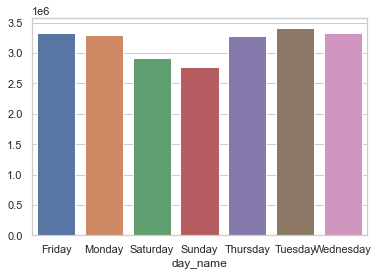

In [206]:
seventies = pd.DataFrame(births_deacades_sum.iloc[1,:]).transpose()
sns.barplot(data = seventies)

<AxesSubplot:xlabel='day_name'>

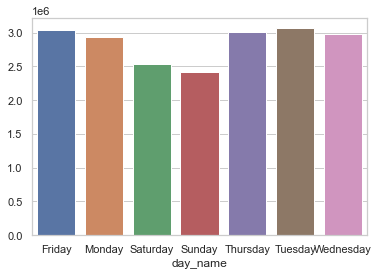

In [207]:
eighties = pd.DataFrame(births_deacades_sum.iloc[2,:]).transpose()
sns.barplot(data = eighties)